In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# The below two are visualization libraires
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image

# for calculating interval
from time import time

plt.rcParams['figure.figsize'] = 10,8 # setting default figure size for the kernel

# for clustering image pixels
from sklearn.cluster import KMeans 
# for simple image processing tasks

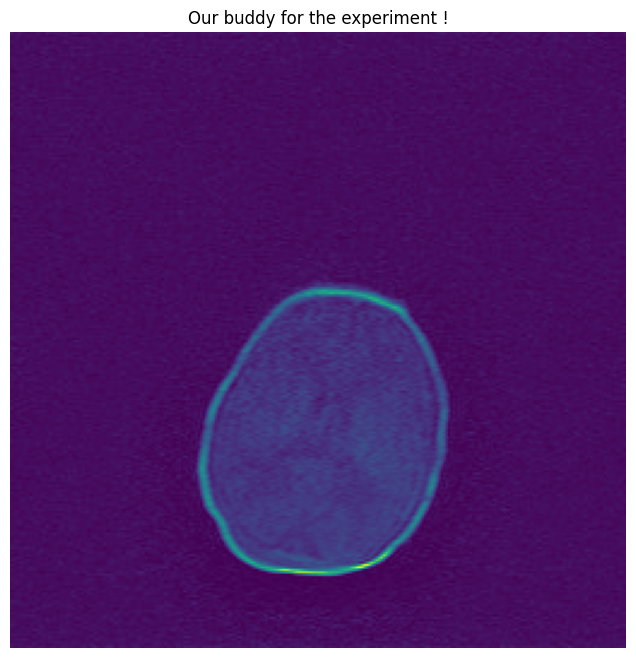

In [12]:
img_original = Image.open('../test.jpg')
plt.axis('off')
plt.imshow(img_original)
plt.title('Our buddy for the experiment !')
plt.show()

In [13]:
img = np.array(img_original,dtype=float) / 255

# Save the dimensions, we will be need them later
w, h, d = original_shape = img.shape
print('Original Shape'.center(20,'='))
print(img.shape)

# image_array size - w*h , d
image_array = img.reshape(-1,d)
print('ReShaped'.center(20,'='))
print(image_array.shape)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
n_colours = [64,32]

# 64 colour image
t0 = time()
kmeans64 = KMeans(n_clusters = n_colours[0],random_state=42,verbose=2).fit(image_array)

print('Completed 64 clusters in'+ str({round(time()-t0,2)})+'seconds.')

# 32 colour image
t0 = time()
kmeans32 = KMeans(n_clusters = n_colours[1],random_state=42,verbose=2)
kmeans32.fit(image_array)

print('Completed 32 clusters in' + str({round(time()-t0,2)})+  ' seconds.')

labels64 = kmeans64.labels_
labels32 = kmeans32.labels_


In [ ]:

print('Within cluster sum of square error for'+str( {n_colours[0]})+' clusters = '+str({round(kmeans64.inertia_,2)}))
print('Within cluster sum of square error for'+str( {n_colours[1]})+' clusters = '+str({round(kmeans32.inertia_,2)}))
# print('Within cluster sum of square error for {n_colours[1]} clusters = {round(kmeans32.inertia_,2)}')

In [ ]:
import matplotlib.image as mpimg
def recreate_image(centroids, labels, w, h):
    # centroids variable are calculated from the flattened image
    # centroids: w*h, d 
    # so each row depicts the values per depth
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            # filling values in new image with centroid values
            image[i][j] = centroids[labels[label_idx]]
            label_idx += 1      
    return image

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.subplot(131)
plt.axis('off')
plt.title('Compressed image (64 colors, K-Means)')
k64 = recreate_image(kmeans64.cluster_centers_, labels64, w, h)
plt.imshow(k64)
mpimg.imsave('./K_64.jpeg', k64)

plt.subplot(133)
plt.axis('off')
plt.title('Compressed image (32 colors, K-Means)')
k32 = recreate_image(kmeans32.cluster_centers_, labels32, w, h)
plt.imshow(k32)
mpimg.imsave('./K_32.jpeg', k32)
plt.show()


In [ ]:
import os
print(os.stat('./image.jpeg').st_size/1024)
print(os.stat('./K_64.jpeg').st_size/1024)
print(os.stat('./K_32.jpeg').st_size/1024)